In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [92]:
data= pd.read_csv("50_Startups.csv")

data=data.rename(columns={"R&D Spend":"RD","Marketing Spend": "MarketingSpend"})
print(data.columns)
data

Index(['RD', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')


,RD,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [93]:
data.describe()

,RD,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [94]:
data1=pd.get_dummies(data,columns=[ 'State'])

In [95]:

data1

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [96]:
Startups=data1.rename(columns={"State_New York":"State_NewYork"})
Startups

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [97]:
Startups.isna().sum()

RD                  0
Administration      0
MarketingSpend      0
Profit              0
State_California    0
State_Florida       0
State_NewYork       0
dtype: int64

# Correlation matrix


In [98]:
Startups.corr()

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
RD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MarketingSpend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


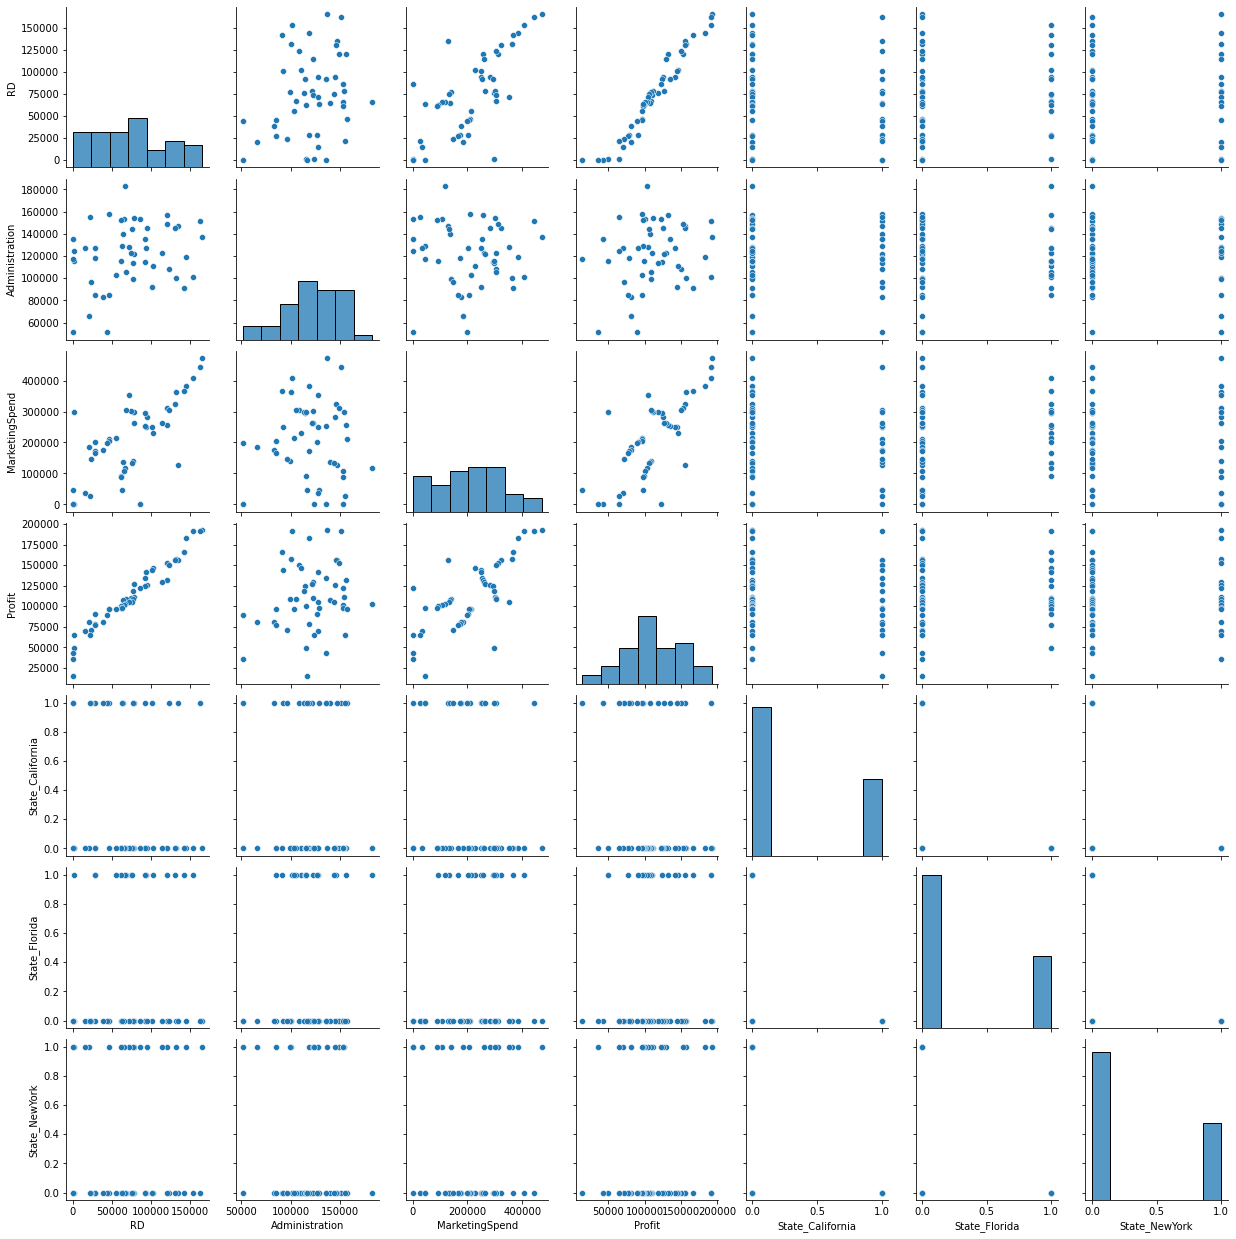

In [99]:
sns.pairplot(Startups)

# Preparing model

In [100]:
import statsmodels.formula.api as smf
model=smf.ols("Profit ~ RD + Administration + MarketingSpend+State_California+State_Florida+ State_NewYork", data=Startups).fit()
model.params

Intercept           37633.233317
RD                      0.806023
Administration         -0.027004
MarketingSpend          0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [101]:
print(model.tvalues,'\n', model.pvalues)
#Administration and MarketingSpend are insignificant as pvalue>

Intercept            7.417409
RD                  17.368580
Administration      -0.517012
MarketingSpend       1.573889
State_California     5.099242
State_Florida        4.654306
State_NewYork        5.007401
dtype: float64 
 Intercept           2.807645e-09
RD                  2.578772e-21
Administration      6.077373e-01
MarketingSpend      1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64


In [102]:
print(model.rsquared,model.rsquared_adj)

0.9507524843355148 0.945156175737278


In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        20:42:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD                   0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend       0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Simple linear regression model

In [104]:
model2=smf.ols("Profit~Administration", data=Startups).fit()
model2.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [105]:
print(model2.tvalues,'\n', model2.pvalues)
#Administration is insignificant 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [106]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 27 Jul 2021   Prob (F-statistic):              0.162
Time:                        20:42:59   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model3=smf.ols("Profit~MarketingSpend", data=Startups).fit()
model3.params


Intercept         60003.548816
MarketingSpend        0.246459
dtype: float64

In [108]:
print(model3.tvalues,'\n', model3.pvalues)
#MarketingSpend is significant

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [109]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        20:43:08   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model4=smf.ols("Profit~Administration+MarketingSpend", data=Startups).fit()
model4.params

Intercept         20224.429059
Administration        0.323673
MarketingSpend        0.248844
dtype: float64

In [111]:
print(model4.tvalues,'\n', model4.pvalues)
#Both Administration and MarketingSpend are significant

Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64


In [112]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           2.50e-10
Time:                        20:43:17   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [113]:
rsq1= smf.ols('RD~Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data=Startups).fit().rsquared 
vif1= 1/(1-rsq1)
rsq2= smf.ols('Administration~RD+MarketingSpend+State_California+State_Florida+State_NewYork',data=Startups).fit().rsquared 
vif2= 1/(1-rsq2)
rsq3= smf.ols('MarketingSpend~RD+Administration+State_California+State_Florida+State_NewYork',data=Startups).fit().rsquared 
vif3= 1/(1-rsq3)

d1 = {'Variables':['RD','Administration','MarketingSpend'],'VIF':[vif1,vif2,vif3]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.495511
1,Administration,1.177766
2,MarketingSpend,2.416797


# Test for Normality of Residuals (Q-Q Plot)

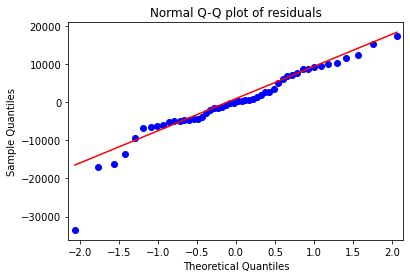

In [114]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Model Deletion Diagnostics


#Detecting Influencers/Outliers

#Cook’s Distance


In [115]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


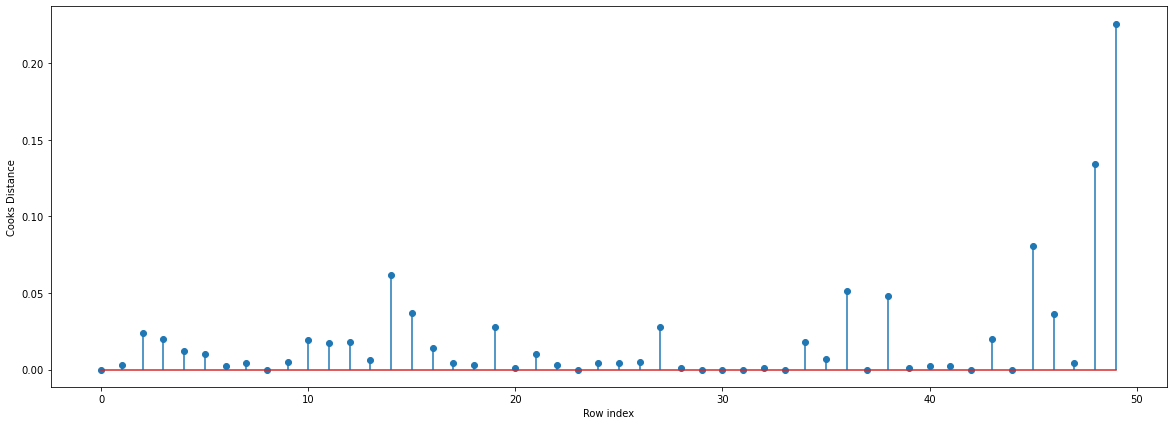

In [116]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [117]:
np.argmax(c) , np.max(c)

(49, 0.22625094501509285)

# High Influence points

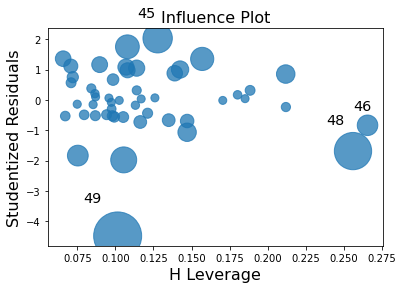

In [118]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [119]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

In [120]:
Startups[Startups.index.isin([49])]

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [121]:
Startups.head()

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Improving the model


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation


In [122]:
Startups_new=Startups.drop(Startups.index[49],axis=0).reset_index()
Startups_new

,index,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [123]:

Startups_new.drop(['index'],axis=1)

,RD,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# Model Deletion Diagnostics and Final Model¶


In [125]:
model_new = smf.ols("Profit~RD + Administration + MarketingSpend+State_California+State_Florida+ State_NewYork", data=Startups_new).fit()

In [126]:
model_new.params

Intercept           39154.863638
RD                      0.783589
Administration         -0.022022
MarketingSpend          0.025821
State_California    14224.368528
State_Florida       12660.144283
State_NewYork       12270.350827
dtype: float64

In [127]:
model_new_influence=model5.get_influence()
(c_5,_)=model_new_influence.cooks_distance

In [128]:
np.argmax(c_5) , np.max(c_5)

(48, 0.24352817571403917)

In [ ]:
#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [129]:
model_new.rsquared, model_new.aic

(0.9618082858227786, 1023.9380387909305)

# Predicting for new data

In [132]:
pred=model_new.predict(Startups_new)
pred

0     190158.286186
1     188917.339413
2     180356.022379
3     171835.121622
4     170611.039177
5     161933.895088
6     158918.600300
7     159073.187404
8     150652.118920
9     155504.737225
10    135154.667794
11    136691.955053
12    129012.886836
13    129003.663840
14    148977.165563
15    145223.746646
16    118657.325455
17    129698.996135
18    128809.413614
19    115762.021212
20    118335.175808
21    117203.470112
22    114924.439923
23    110273.368722
24    113239.472233
25    104538.867178
26    111129.014562
27    114231.691138
28    102600.701013
29    102229.270972
30    100199.636827
31     98246.061777
32    101409.986650
33     98572.020995
34     91728.442639
35     90915.064149
36     76670.864918
37     91870.126205
38     70608.331245
39     86284.488238
40     77761.930431
41     76052.890196
42     73607.243231
43     61687.603280
44     68079.899186
45     49523.991273
46     57967.070070
47     50396.799144
48     50710.448014
dtype: float64

# table containing R^2 value for each prepared model¶


In [136]:
d={"model":["Model","Model_new"], 'rsquare':[model.rsquared,model_new.rsquared]}
d


{'model': ['Model', 'Model_new'],
 'rsquare': [0.9507524843355148, 0.9618082858227786]}

In [137]:
table=pd.DataFrame(d)
table

,model,rsquare
0,Model,0.950752
1,Model_new,0.961808
